In [ ]:
import clustbench # clustering-benchmarks
import os.path, genieclust, sklearn.cluster # we will need these later
import matplotlib.pyplot as plt, numpy as np, pandas as pd

In [27]:
# data_path = os.path.join("~", "Projects", "clustering-data-v1") # example
data_url = "https://github.com/gagolews/clustering-data-v1/raw/v1.1.0"
benchmark = clustbench.load_dataset("wut", "x2", url=data_url)
X = benchmark.data

In [28]:
X[:5, :]  # preview

array([[-0.16911768, -0.25135161],
       [-0.1766741 , -0.48302182],
       [-0.14232868, -0.36194586],
       [-0.10637437, -0.70068869],
       [-0.49353006, -0.23587466]])

In [29]:
X.shape

(120, 2)

In [30]:
X[0]

array([-0.16911768, -0.25135161])

In [19]:
benchmark.labels[0]  # preview

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [31]:
benchmark.labels[1]  # preview

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0,
       1, 0, 1, 1, 1, 4, 1, 4, 0, 1, 0, 1, 2, 2, 0, 3, 1, 1, 1, 4, 1, 0,
       4, 1, 1, 4, 4, 2, 1, 1, 4, 0, 1, 0, 1, 1, 4, 2, 1, 0, 1, 1, 1, 4,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [21]:
len(benchmark.labels)

2

In [32]:
"""
each dataset can have multiple labels, 
pick one at a time and that defines your partition size, aka k
"""
y_true = benchmark.labels[1] 
(k := max(y_true))  # or benchmark.n_clusters[0]

4

In [23]:
# testing genieclust
g = genieclust.Genie(n_clusters=k)  # using default parameters
(y_pred := g.fit_predict(X) + 1)  # +1 makes cluster IDs in 1..k, not 0..(k-1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 3, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 4, 4, 4])

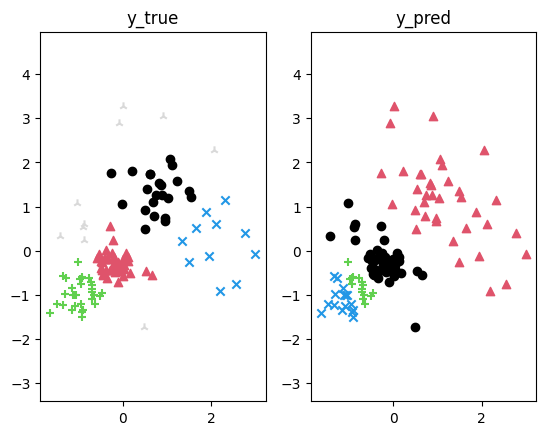

In [24]:
plt.subplot(1, 2, 1)
genieclust.plots.plot_scatter(X, labels=y_true-1, axis="equal", title="y_true")
plt.subplot(1, 2, 2)
genieclust.plots.plot_scatter(X, labels=y_pred-1, axis="equal", title="y_pred")
plt.show()

Overall, Genie returned a clustering quite similar to the reference one. We may consider 107 (namely, c11 + c22 + c33 ) out of the 120 input points as correctly grouped. In particular, all the red and green reference points (the 2nd and the 3rd row) have been properly discovered.

In [25]:
genieclust.compare_partitions.confusion_matrix(y_true, y_pred)


array([[ 6,  4,  0,  0],
       [ 0, 22,  0,  0],
       [46,  0,  0,  0],
       [ 0,  0, 15, 16],
       [ 0, 11,  0,  0]])

In [26]:
"""
Normalized Clustering Accuracy (NCA) 
NCA is the averaged percentage of correctly classified points in each cluster 
above the perfectly uniform label distribution.
"""
genieclust.compare_partitions.normalized_clustering_accuracy(y_true, y_pred)


0.3790322580645161